Dear Participant,

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

#Attribute Information:

#Matrix column entries (attributes):
#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [4]:
# Import required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Q1. Load the dataset 

In [5]:
park = pd.read_csv('D:/PGPDSE/SLC/parkinsons.csv')
display(park.head())
print(park.shape)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


(195, 24)


### Q2. Use the .describe() method on the dataset and state any insights you may come across.

In [6]:
display(park.describe().T)

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


#### Insights:
1. We can see that there are no null values in the dataset.
2. Few variables are right skewed since the mean is greater than the median
3. Few variables are approximately normally distributed since the mean and median are quite close to each other.

### Q3. Check for class imbalance. Do people with Parkinson's have greater representation in the dataset?

In [7]:
print(park['status'].value_counts(normalize = 'True'))

1    0.753846
0    0.246154
Name: status, dtype: float64


#### 75% of the cases in the dataset have Parkinson's disease. So, we can say that the class imbalance is present and people with Parkinson's have greater representation in the dataset

### Q4. Check for missing vaues and take necessary measures by dropping observation or imputing them.

In [8]:
print(park.isna().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


#### There are no missing values in the dataset

### Q5. Plot the distribution of all the features. State any observations you can make based on the distribution plots.

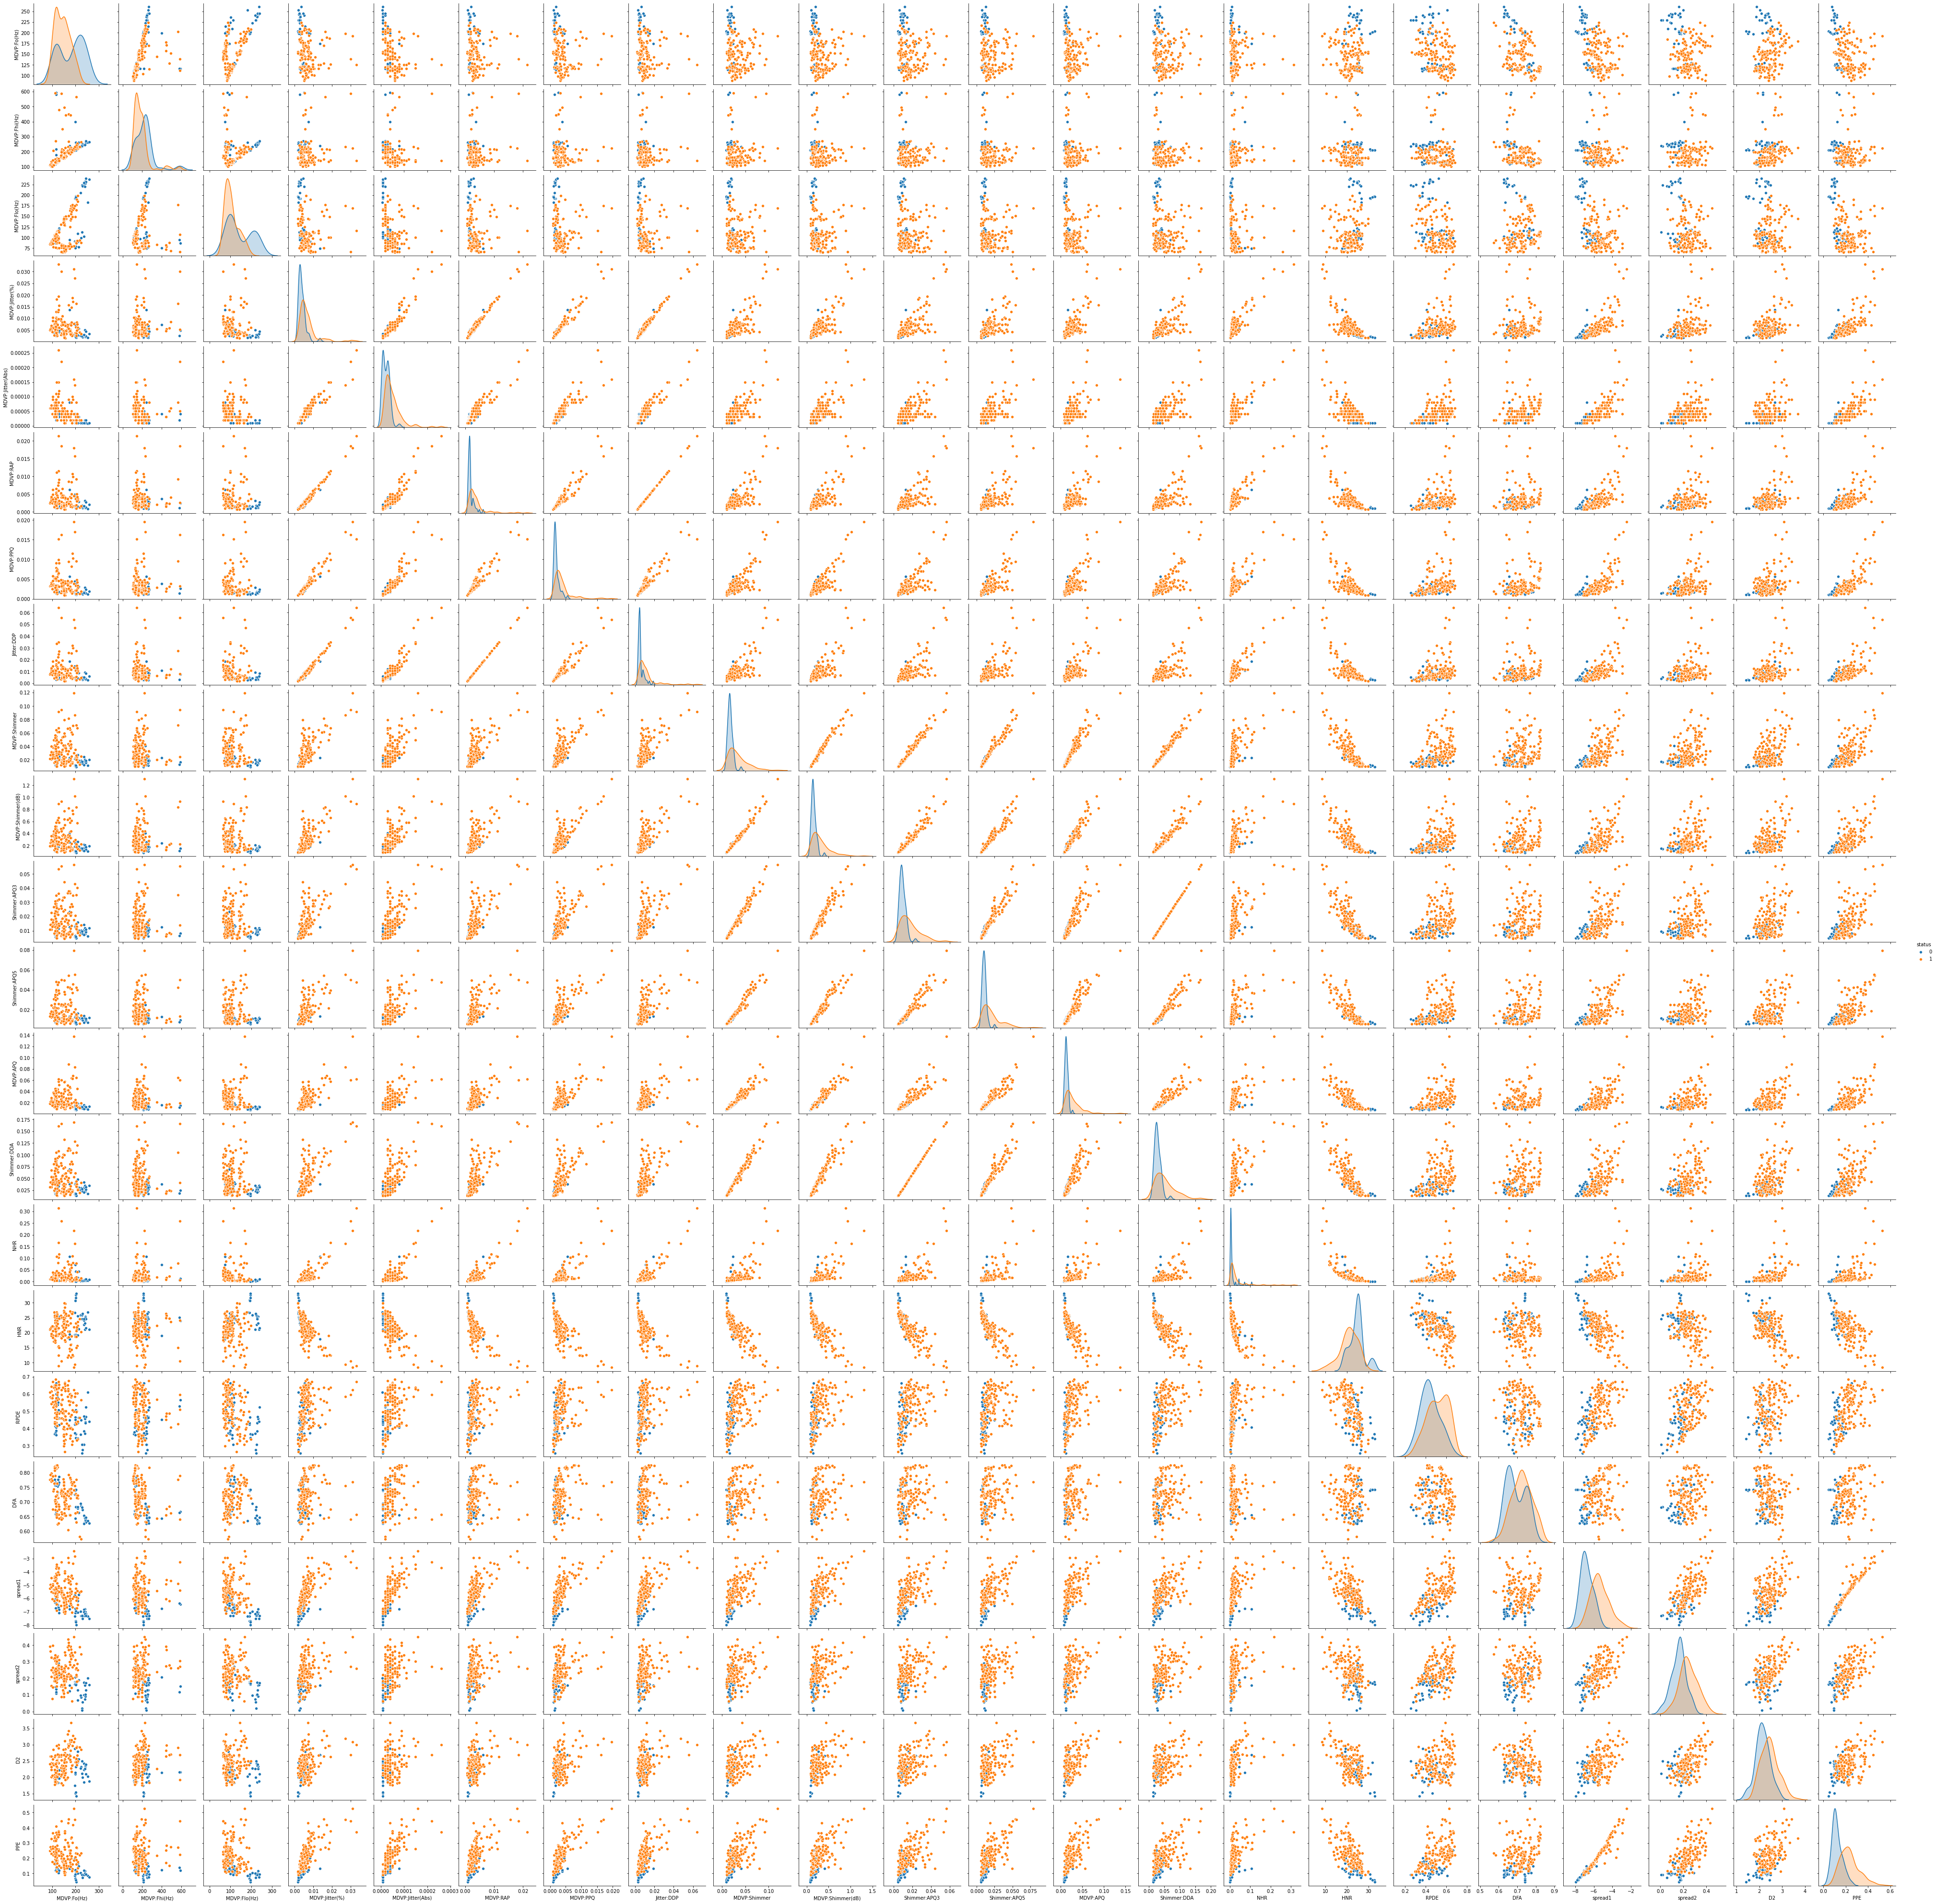

In [9]:
sns.pairplot(park, hue = 'status')
plt.show()

#### Observations:
1. Most of the Healthy subjects have a higher value of Average Vocal Fundamental Frequency and Minimum Vocal Fundamental Frequency
2. The distribution of MDVP:Fhi(Hz) i.e. Maximum Vocal Fundamental Frequency is right skewed for both the subjects indicating presence of some outliers in the variable.
3. Several meaures of variation in Fundamental Frequency and Amplitude have a higher value for diseased subjects and their distributions are right skewed indicating presence of outliers w.r.t. to class 1 (Parkinson's).
4. NHR generally has higher values for diseased subjects and some outliers are also present in its distribution w.r.t. class 1 (Parkinson's) making it right skewed.
5. HNR generally has higher values for healthy subjects and some outliers are also present in its distribution w.r.t. class 0 (Healthy) making it right skewed.
6. RPDE is approximately normally distributed for both the classes.
7. D2 generally has higher values for diseased subjects but is approximately normally distributed.
8. Spread1, Spread2 and PPE generally have higher values for diseased subjects. However, Spread1 and Spread2 are approximately normally distributed while PPE is right skewed w.r.t. class 1 (Parkinson's) indicating presence of some outliers having higher values.
9. DFA is approximately normally distributed for both the classes but for class 0 (Healthy) there are 2 distinct distribution within.

### Q6. Check for outliers in the data. Are there any variables with high amount of outliers.

In [10]:
var = park.drop(['name', 'status'], axis = 1).columns
print('Number of outliers in different variables are\n')
for i in var:
    q1 = park[i].quantile(0.25)
    q3 = park[i].quantile(0.75)
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    count = park[i][(park[i] < lw) | (park[i] > uw)].shape[0]
    print(f'{i}: {count}')

Number of outliers in different variables are

MDVP:Fo(Hz): 0
MDVP:Fhi(Hz): 11
MDVP:Flo(Hz): 9
MDVP:Jitter(%): 14
MDVP:Jitter(Abs): 6
MDVP:RAP: 14
MDVP:PPQ: 15
Jitter:DDP: 14
MDVP:Shimmer: 8
MDVP:Shimmer(dB): 10
Shimmer:APQ3: 6
Shimmer:APQ5: 13
MDVP:APQ: 12
Shimmer:DDA: 6
NHR: 19
HNR: 3
RPDE: 0
DFA: 0
spread1: 4
spread2: 2
D2: 1
PPE: 5


#### There are a number of variables having outliers. Few of them can be considered to be having high number of outliers since there are total 195 observations only.

### Q7. Are there any strong correlations among the independent features?

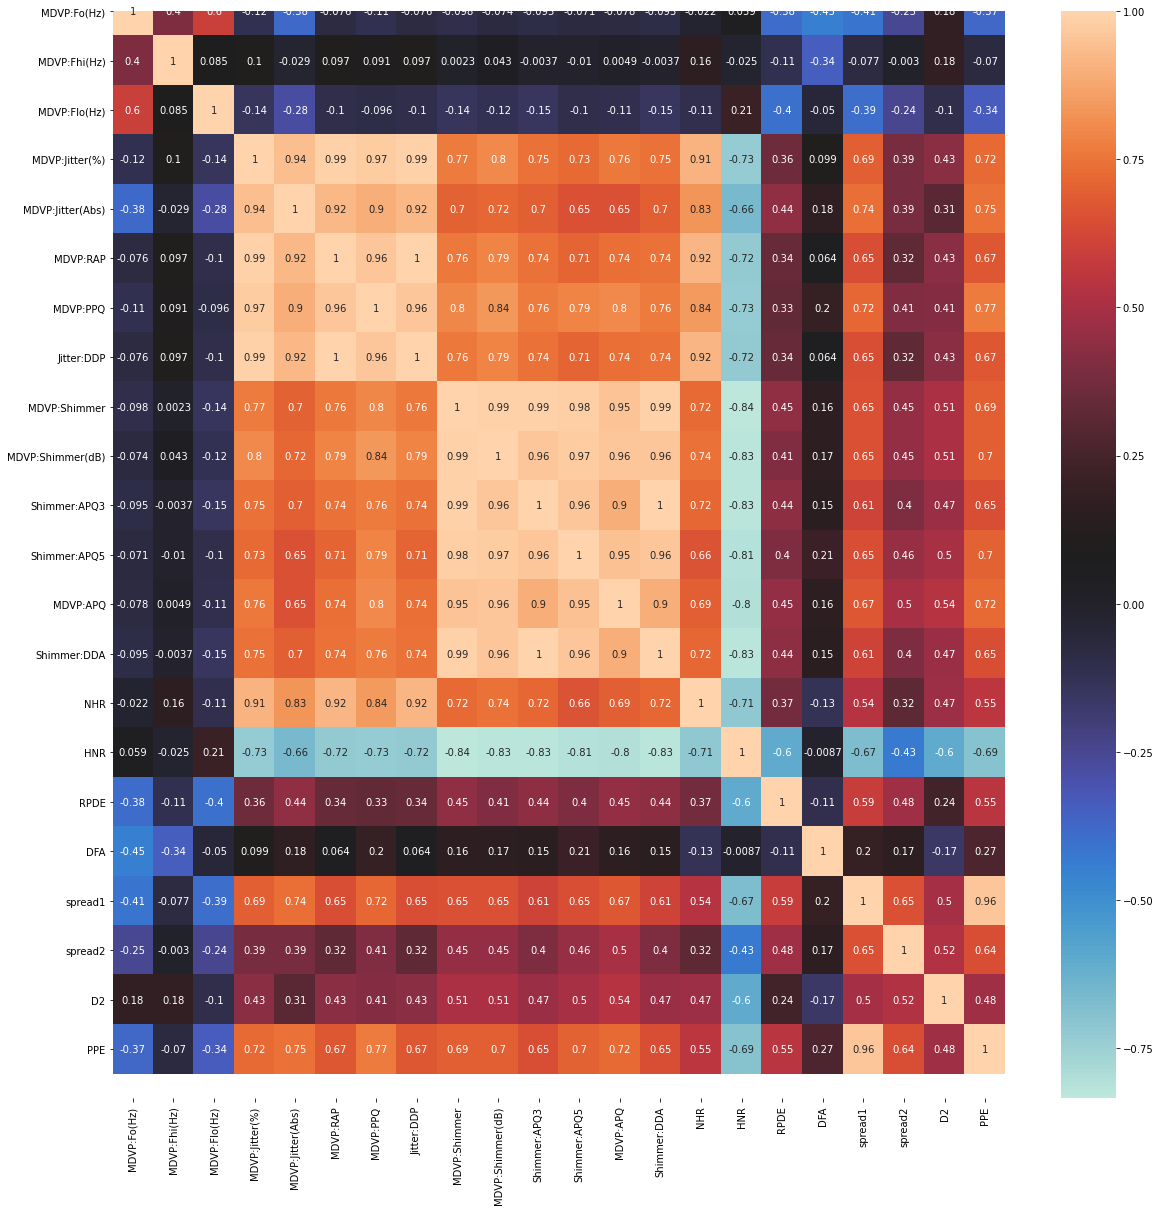

In [11]:
corr = park.drop(['name', 'status'], axis = 1).corr()
plt.figure(figsize = (20, 20))
ax = sns.heatmap(corr, annot = True, cmap = 'icefire')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top + 0.5)
plt.show()

#### There are many strong correlations among the independent features

### Q8. Split dataset into training & test dataset  

In [12]:
X = park.drop(['name', 'status'], axis = 1)
y = park['status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

### Q9. Create a default decision tree model using criterion = Entropy 

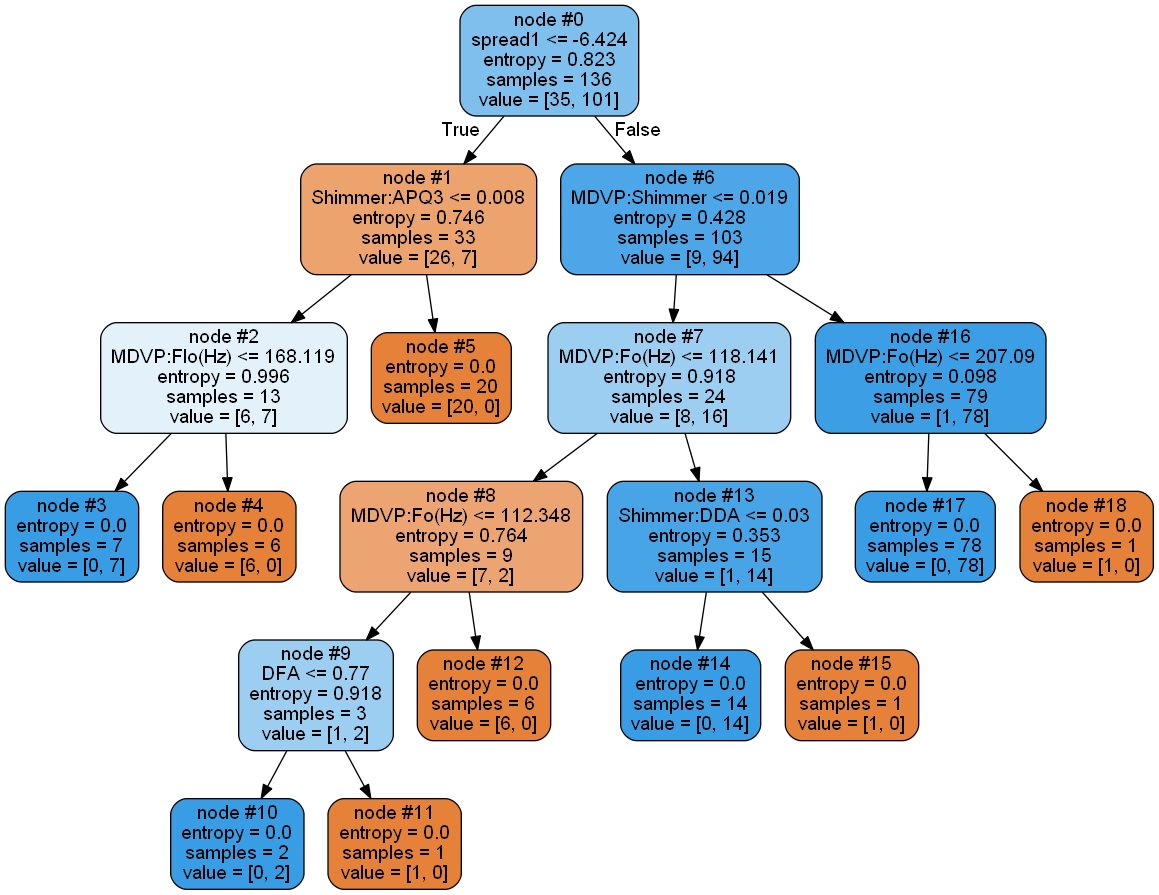

In [13]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import pydotplus

dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 3)
dt.fit(X_train, y_train)

dot_data = export_graphviz(dt, out_file = None, feature_names = X_train.columns, filled = True, rounded = True, 
                           impurity = True, node_ids = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [14]:
print("Model Accuracy for default decision tree:", dt.score(X_test, y_test))

Model Accuracy for default decision tree: 0.847457627118644


### Q10.  Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? 

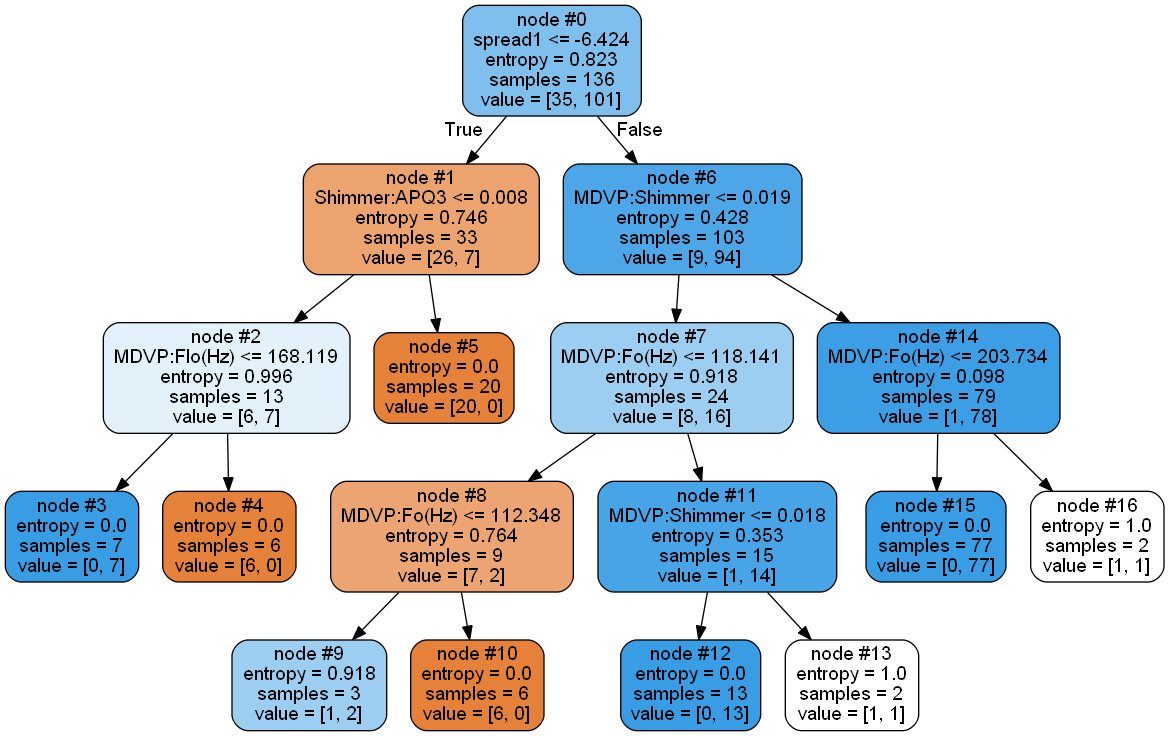

In [15]:
dt_reg = DecisionTreeClassifier(criterion = 'entropy', random_state = 3, max_depth = 4, min_samples_leaf = 2)
dt_reg.fit(X_train, y_train)

dot_data = export_graphviz(dt_reg, out_file = None, feature_names = X_train.columns, filled = True, rounded = True, 
                           impurity = True, node_ids = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [16]:
print("Model Accuracy for Regularized decision tree:", dt_reg.score(X_test, y_test),'\n(max_depth = 4 and min_samples_leaf = 2)')

Model Accuracy for Regularized decision tree: 0.864406779661017 
(max_depth = 4 and min_samples_leaf = 2)


Model accuracy has increased to 0.864 from the previous one of 0.847.

Regularization helps to reduce the overfitting.

### Q11. Implement a Random Forest model. What is the optimal number of trees that gives the best result?

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

rf = RandomForestClassifier(random_state = 3)
params = {'n_estimators' : sp_randint(50, 200)}
rsearch = RandomizedSearchCV(rf, param_distributions = params, n_iter = 100, scoring = 'roc_auc', n_jobs = -1,
                             cv = 10, random_state = 3, return_train_score = True)

rsearch.fit(X, y)
print(rsearch.best_params_)

{'n_estimators': 50}


##### Since we are getting n_estimators to be 50 (the lowest limit that we had set), we would run it again after reducing the lower and upper limit to arrive at the optimal number.

In [18]:
rf = RandomForestClassifier(random_state = 3)
params = {'n_estimators' : sp_randint(25, 75)}
rsearch = RandomizedSearchCV(rf, param_distributions = params, n_iter = 50, scoring = 'roc_auc', n_jobs = -1,
                             cv = 10, random_state = 3, return_train_score = True)

rsearch.fit(X, y)
print(rsearch.best_params_)

{'n_estimators': 51}


##### The optimal number of trees from the above process is coming out to be 51 which is not much different than our previous result of 50 trees. 
#### From the above result we can conclude that the optimal number of trees are 51.

###### Fitting the model with the optimal number of trees and getting the different metrics.

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

rsearch.fit(X_train, y_train)

y_pred = rsearch.predict(X_test)
y_prob = rsearch.predict_proba(X_test)[:, 1]

print("Accuracy of Random Forest Model with optimal number of trees (51):", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy of Random Forest Model with optimal number of trees (51): 0.864406779661017

Confusion Matrix:
 [[10  3]
 [ 5 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.77      0.71        13
           1       0.93      0.89      0.91        46

    accuracy                           0.86        59
   macro avg       0.80      0.83      0.81        59
weighted avg       0.87      0.86      0.87        59




AUC Score: 0.943979933110368


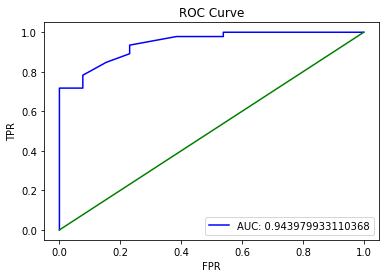

In [20]:
print("\nAUC Score:", roc_auc_score(y_test, y_prob))

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label = "AUC: " + str(roc_auc_score(y_test, y_prob)), color = 'b')
plt.plot(fpr, fpr, color = 'g')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend(loc = 'best')
plt.show()